In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\Admin\Downloads\dataset\insurance.csv')
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
#checking number of missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [6]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Data Analysis**

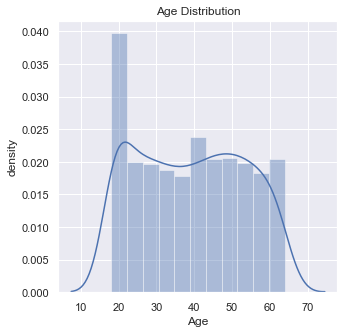

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize = (5, 5))
sns.distplot(data['age'])
plt.xlabel('Age')
plt.ylabel('density')
plt.title("Age Distribution")
plt.show()

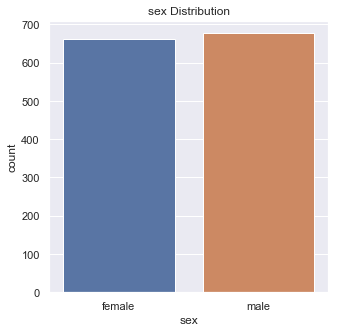

In [10]:
plt.figure(figsize = (5, 5))
sns.countplot(data['sex'])
plt.title("sex Distribution")
plt.show()

In [11]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

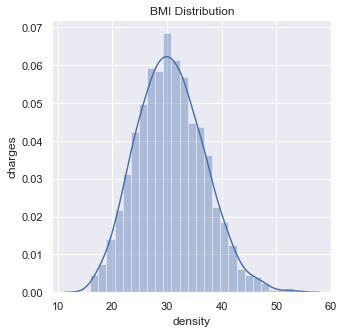

In [12]:
plt.figure(figsize = (5, 5))
sns.distplot(data['bmi'])
plt.xlabel('density')
plt.ylabel('charges')
plt.title("BMI Distribution")
plt.show()

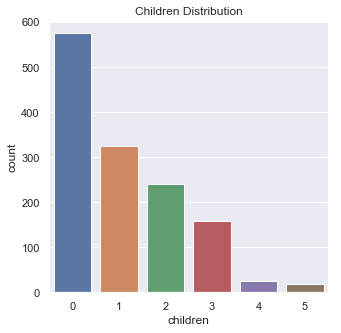

In [13]:
plt.figure(figsize = (5, 5))
sns.countplot(data['children'])
plt.title("Children Distribution")
plt.show()

In [14]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

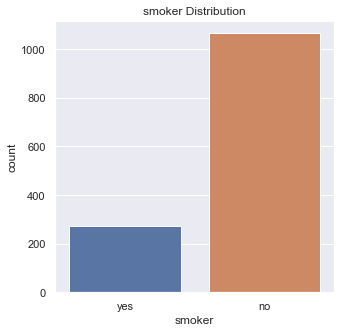

In [15]:
plt.figure(figsize = (5, 5))
sns.countplot(data['smoker'])
plt.title("smoker Distribution")
plt.show()

In [16]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

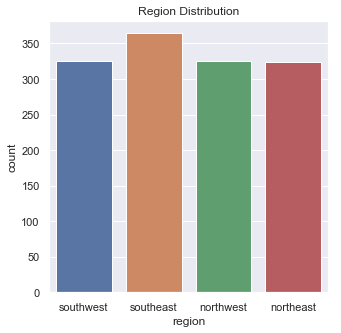

In [17]:
plt.figure(figsize = (5, 5))
sns.countplot(data['region'])
plt.title("Region Distribution")
plt.show()

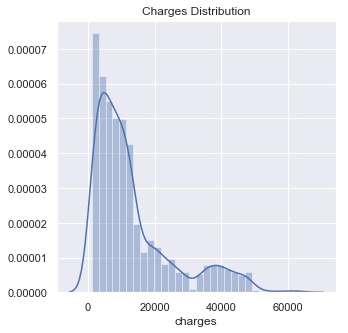

In [18]:
plt.figure(figsize = (5, 5))
sns.distplot(data['charges'])
plt.title("Charges Distribution")
plt.show()

Text(0.5, 1.0, 'region vs charges')

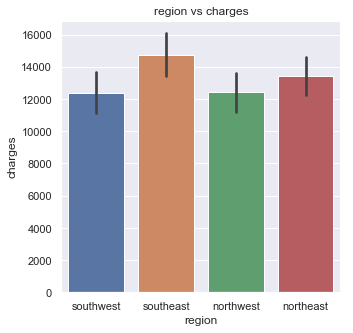

In [19]:
# region vs charges
# From the graph we can see that the region actually does not play any role in determining the insurance charges

plt.figure(figsize = (5, 5))
sns.barplot(x = 'region', y = 'charges', data = data)

plt.title('region vs charges')

Text(0.5, 1.0, 'children vs charges')

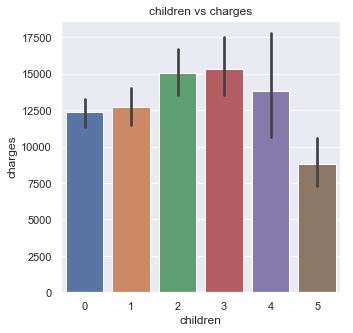

In [20]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (5, 5))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('children vs charges')

Text(0.5, 1.0, 'smoker vs charges')

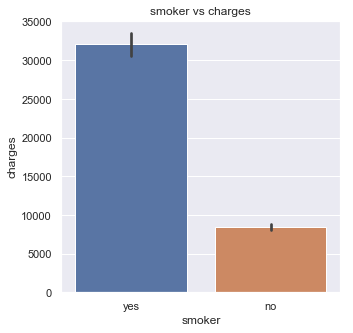

In [21]:
# smoker vs charges
# from the graph below, it is visible that smokers have more insurance charges than the non smokers

plt.figure(figsize = (5, 5))
sns.barplot(x = 'smoker', y = 'charges', data = data)
plt.title('smoker vs charges')

Text(0.5, 1.0, 'sex vs charges')

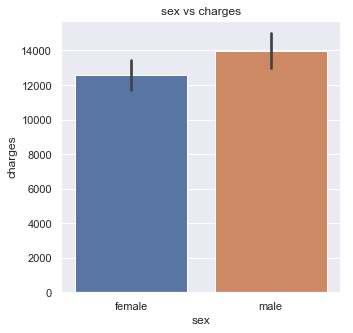

In [22]:
plt.figure(figsize = (5, 5))
sns.barplot(x = 'sex', y = 'charges', data = data)
plt.title('sex vs charges')

Text(0.5, 1.0, 'age vs charges')

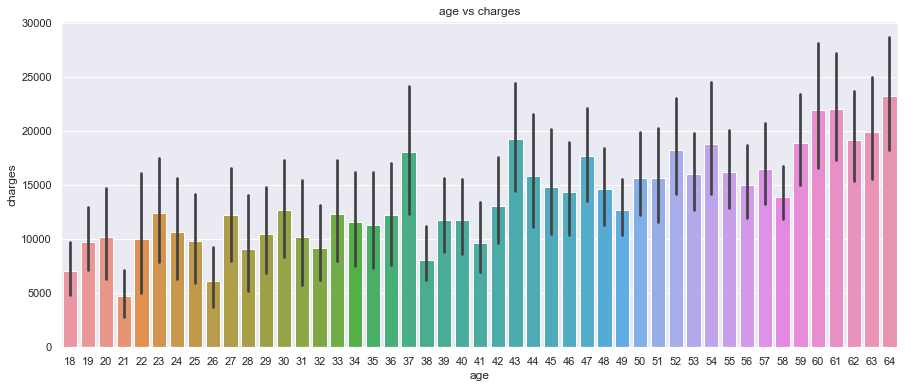

In [23]:
plt.figure(figsize = (15, 6))
sns.barplot(x = 'age', y = 'charges', data = data)
plt.title('age vs charges')

**Data Preprocessing**

In [24]:
#removing unnecessary columns from the dataset
data=data.drop('region', axis=1)
print(data.shape)
data.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [25]:
#encoding sex, smoker and region columns
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
print(data)

      age  sex     bmi  children  smoker      charges
0      19    1  27.900         0       0  16884.92400
1      18    0  33.770         1       1   1725.55230
2      28    0  33.000         3       1   4449.46200
3      33    0  22.705         0       1  21984.47061
4      32    0  28.880         0       1   3866.85520
5      31    1  25.740         0       1   3756.62160
6      46    1  33.440         1       1   8240.58960
7      37    1  27.740         3       1   7281.50560
8      37    0  29.830         2       1   6406.41070
9      60    1  25.840         0       1  28923.13692
10     25    0  26.220         0       1   2721.32080
11     62    1  26.290         0       0  27808.72510
12     23    0  34.400         0       1   1826.84300
13     56    1  39.820         0       1  11090.71780
14     27    0  42.130         0       0  39611.75770
15     19    0  24.600         1       1   1837.23700
16     52    1  30.780         1       1  10797.33620
17     23    0  23.845      

**Splitting features and target**

In [26]:
X=data.drop(columns='charges', axis=1)
Y=data['charges']

In [27]:
print(X)

      age  sex     bmi  children  smoker
0      19    1  27.900         0       0
1      18    0  33.770         1       1
2      28    0  33.000         3       1
3      33    0  22.705         0       1
4      32    0  28.880         0       1
5      31    1  25.740         0       1
6      46    1  33.440         1       1
7      37    1  27.740         3       1
8      37    0  29.830         2       1
9      60    1  25.840         0       1
10     25    0  26.220         0       1
11     62    1  26.290         0       0
12     23    0  34.400         0       1
13     56    1  39.820         0       1
14     27    0  42.130         0       0
15     19    0  24.600         1       1
16     52    1  30.780         1       1
17     23    0  23.845         0       1
18     56    0  40.300         0       1
19     30    0  35.300         0       0
20     60    1  36.005         0       1
21     30    1  32.400         1       1
22     18    0  34.100         0       1
23     34    1  

In [28]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
6        8240.58960
7        7281.50560
8        6406.41070
9       28923.13692
10       2721.32080
11      27808.72510
12       1826.84300
13      11090.71780
14      39611.75770
15       1837.23700
16      10797.33620
17       2395.17155
18      10602.38500
19      36837.46700
20      13228.84695
21       4149.73600
22       1137.01100
23      37701.87680
24       6203.90175
25      14001.13380
26      14451.83515
27      12268.63225
28       2775.19215
29      38711.00000
           ...     
1308    33900.65300
1309     6875.96100
1310     6940.90985
1311     4571.41305
1312     4536.25900
1313    36397.57600
1314    18765.87545
1315    11272.33139
1316     1731.67700
1317     1163.46270
1318    19496.71917
1319     7201.70085
1320     5425.02335
1321    28101.33305
1322    12981.34570
1323    43896.37630
1324     4239.89265
1325    13143.33665
1326     7050.02130


**Splitting the data into Train and Test data**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 5) (1070, 5) (268, 5)


**Model Training**
    

Linear Regression

In [30]:
#loading regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Model Evaluation**

In [31]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)
# r squared value
from sklearn import metrics
r2_train= metrics.r2_score(Y_train, training_data_prediction)
print('R squared value :', r2_train)

R squared value : 0.7511416233816596


In [32]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)
r2_test= metrics.r2_score(Y_test, test_data_prediction)
print('R squared value :', r2_test)

R squared value : 0.7428803779811104


In [33]:
#cross validation
from sklearn.model_selection import cross_val_score
CV = [] # list for CV scores mean
scores=cross_val_score(regressor, X_train, Y_train, scoring='r2', cv=5)
print("CV scores:",scores,"\n")
CV.append(scores.mean())
print("CV scores mean:",scores.mean())

CV scores: [0.79684608 0.80652097 0.7667892  0.6294878  0.6776965 ] 

CV scores mean: 0.7354681092071209


In [34]:
dframe=pd.DataFrame(Y_test, test_data_prediction)
dfr=pd.DataFrame({'Actual':Y_test, 'Predicted':test_data_prediction})
print(dfr)

           Actual     Predicted
17     2395.17155   1472.107481
1091  11286.53870  11463.646164
273    9617.66245  10014.353222
270    1719.43630   2566.761066
874    8891.13950   7883.987944
790    5662.22500  11262.254437
957   12609.88702   3252.806397
492    2196.47320    624.826810
1125  14254.60820  11959.363083
794    7209.49180   9275.780085
575   12222.89830  11368.467335
571    2219.44510   5117.104696
235   19444.26580  30324.944354
940    1121.87390      9.606569
658   26392.26029  12232.062165
532   12925.88600  13586.182235
101    3645.08940   3751.823563
1190   5327.40025   7534.227530
142   18972.49500  29781.735383
471    2203.47185   2235.297267
457   11840.77505  12180.106977
363    2597.77900   2389.518347
621   40182.24600  34525.790156
280   22331.56680  31625.242431
1036  37484.44930  30523.886970
1089  10577.08700   9225.953588
579    3206.49135   1871.410901
356    8944.11510  15437.351639
694    3577.99900   6587.572737
388    3176.81590   1849.813370
...     

**Building a Predictive system**

In [36]:
input_data=(30,0,25.46,0,1)
#changing input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array
input_data_reshaped= input_data_as_numpy_array.reshape(1, -1)
prediction=regressor.predict(input_data_reshaped)

print('The insurance cost is',prediction[0])

The insurance cost is 3751.8235632624346


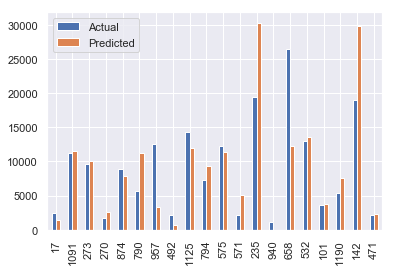

In [37]:
graph=dfr.head(20)
graph.plot(kind='bar')